# **Introduction**

## *The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica.*

# **About the Dataset**


1. Survived - Survival (0 = No; 1 = Yes) 
2.  Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. SibSp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
12. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Total Number of Instances**: 1309

**Number of Features**: 12

**Target Variable**: Survived


### **Importing Basic Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Reading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/test.csv")

### **EDA**

In [4]:
#having a look at the train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#having a look at the test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#getting shape of train and test data
print("Shape of train data:\n",train_data.shape)
print("Shape of test data:\n",test_data.shape)

Shape of train data:
 (891, 12)
Shape of test data:
 (418, 11)


In [7]:
#getting basic statistics for train data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#getting basic statistics for test data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#getting basic information of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#getting basic information of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#checking for null values.
print("Null Values in train data:\n",train_data.isna().sum())
print("Null values in test data:\n",test_data.isna().sum())

Null Values in train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null values in test data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


From here we can conclude that we have missing data in athe age, cabin and embarked coloumns for the train set and in the age, fare and cabin column for the test set.

### **Visualizations**

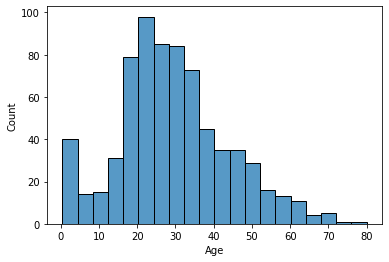

In [12]:
#distribution of the age column in train data
sns.histplot(x=train_data['Age'])

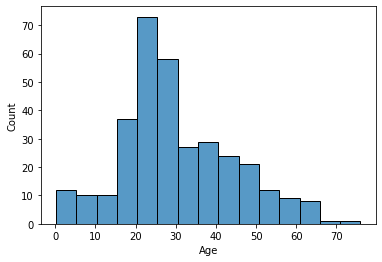

In [13]:
#distribution of the age column in the test data
sns.histplot(x=test_data['Age'])

We see that the age column is right skewed in both test and train datasets.

We see that the count of males is greater in both train and test datasets.

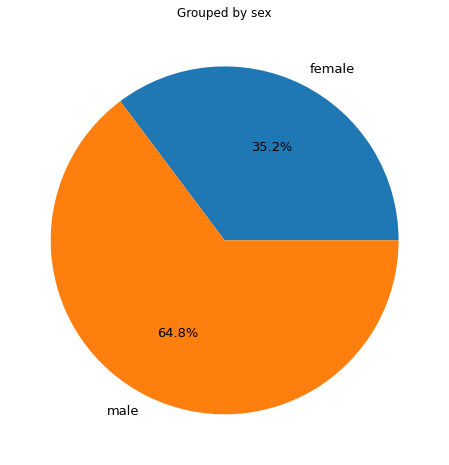

In [14]:
#count of gender
sex_count=train_data.groupby('Sex')['Sex'].count()
plt.figure(figsize=(10,8))
plt.pie(sex_count.values,labels=sex_count.index,autopct='%1.1f%%',textprops={'fontsize':13})
plt.title("Grouped by sex")
plt.show()

Text(0, 0.5, 'Percent Survived')

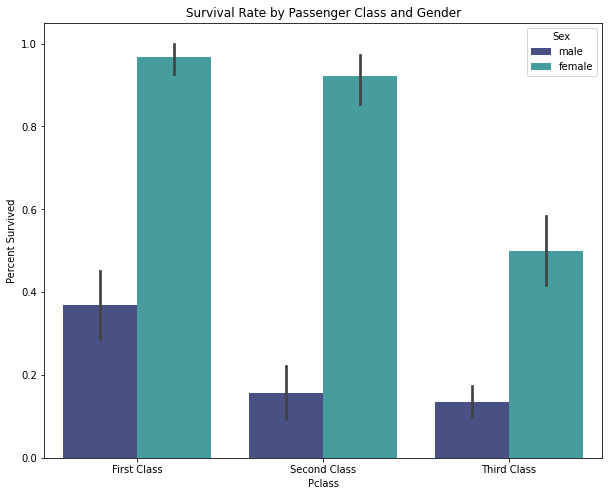

In [15]:
#visualising the survival rate by passenger class and gender.
plt.figure(figsize=(10,8))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data,palette='mako')
plt.title("Survival Rate by Passenger Class and Gender")
loc,labels=plt.xticks()
plt.xticks(loc, ['First Class','Second Class','Third Class'])
plt.ylabel("Percent Survived")

In [16]:
#grouping the values in survived column and counting the number of occurences in each group.
survived_count=train_data.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count of survived')

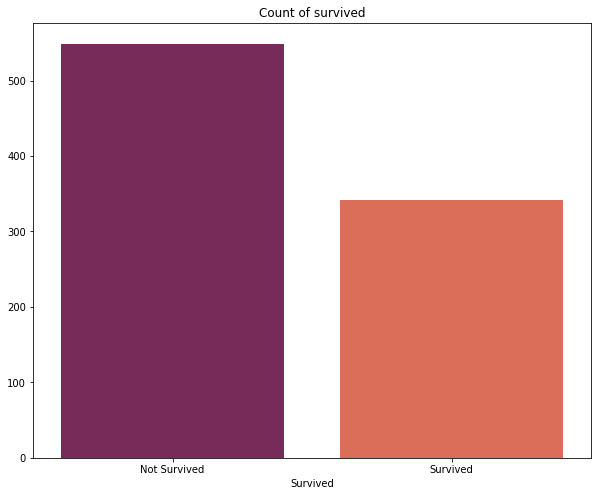

In [17]:
#Visualizing the above result
plt.figure(figsize=(10,8))
sns.barplot(x=survived_count.index,y=survived_count.values,palette='rocket')
plt.xticks([0,1],['Not Survived','Survived'])
plt.title("Count of survived")

We can see that 549 people did not survive whereas the count of survived is only 342. To plot the graph I just passed the index name and its values at the two axes respectively.

Text(0.5, 1.0, 'Survived Count based on Gender')

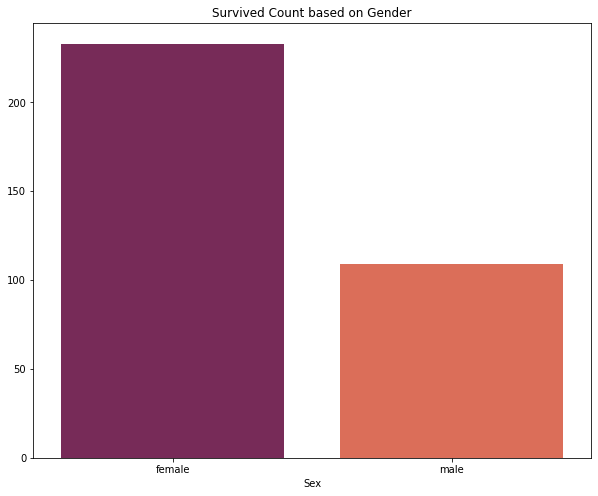

In [18]:
#grouping the values in the survived column to get the count of survived based on gender and visualizing
survived_sex=train_data.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(10,8))
sns.barplot(x=survived_sex.index,y=survived_sex.values,palette='rocket')
plt.title("Survived Count based on Gender")

We can see that feamle survivors(233) are greater than the male survivors (109)

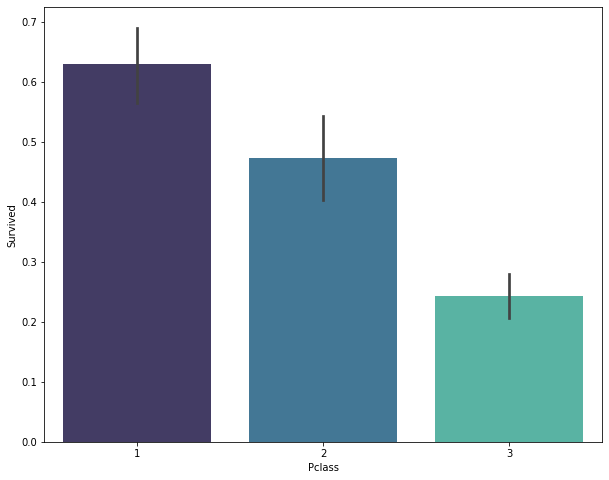

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Pclass',y='Survived',data=train_data,palette='mako')

We can see that person in class 1 has highest chance of survival decreasing in class 2 and the lowest chance of survival in class 3

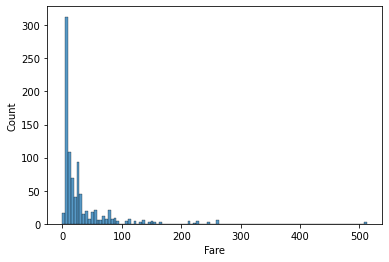

In [20]:
#Looking at the distribution of Fare column
sns.histplot(x=train_data['Fare'])

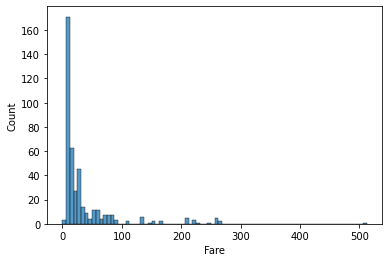

In [21]:
sns.histplot(x=test_data['Fare'])

We can see that the Fare column is right skewed in both train and test datasets.

### **Data Cleaning**

***Missing Value Treatment***

As we saw that there is missing data in the *Age,* *Cabin* and *Embarked* coloumns for the train set and in the *Age*, *Fare* and *Cabin* column for the test set.




We also saw that *Age* and *Fare* columns are right skewed, so the median would be the correct choice to impute the missing values in these columns. 
For the *Cabin* and *Embarked* column we can impute the corresponding modes.

In [22]:
#imputing the missing values
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin']=train_data['Cabin'].fillna(train_data['Cabin'].mode().iloc[0])
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0])
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Cabin']=test_data['Cabin'].fillna(test_data['Cabin'].mode().iloc[0])

In [23]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we can see that there are no missing values left in the dataset.

***Outlier Treatment For Numerical Columns***

In [25]:
#checking for outliers
Q1=train_data.quantile(0.25) #first quartile
Q3=train_data.quantile(0.75) #third quartile
IQR= Q3-Q1 #Inter-Quartile Range
"""Here I have applied a rule of thumb which says that if an observation is less than Q1-1.5*IQR or greater
than Q3+1.5*IQR, it can be considered an outlier"""
((train_data < (Q1-1.5*IQR)) | (train_data > (Q3+1.5*IQR))).sum()

Age             66
Cabin            0
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64

In [26]:
"""Now I replcae the outliers with the extreme values (on the boxplot)"""
for i in ['Age','Fare','Parch','SibSp']:
  Q1=train_data[i].quantile(0.25)
  Q3=train_data[i].quantile(0.75)
  IQR=Q3-Q1
  train_data[i]=np.where(train_data[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),np.where(train_data[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),train_data[i]))

In [27]:
#checking for outliers again.
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

## **Feature Engineering**

As the Sex column is binary, I'll map it directly to convert it into numercial.
For the Pclass column and Embarked column, I'll use the Label Encoder.

In [28]:
#first mapping the Sex column values.
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})

In [29]:
#now encoding the Pclass and Embarked columns.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Pclass']=encoder.fit_transform(train_data['Pclass'])
train_data['Embarked']=encoder.fit_transform(train_data['Embarked'])
test_data['Pclass']=encoder.fit_transform(test_data['Pclass'])
test_data['Embarked']=encoder.fit_transform(test_data['Embarked'])

I drop the *Name*, *PassengerID*, *Ticket* and *Cabin* columns as the name, ID or corresponding ticket number and cabin does not affect whether a person survives or not.

In [30]:
train_data=train_data.drop(columns=['Name','PassengerId','Ticket','Cabin'])
test_data=test_data.drop(columns=['Name','PassengerId','Ticket','Cabin'])

## **Model Building**

**Now as there are no missing values or outliers in the  data and I've done the Feature Engineering, I can finally create the *Predictors* and the *Target* variables.**

In [38]:
x=train_data.iloc[:,train_data.columns != 'Survived']
y=train_data['Survived']

I will split the train data using train test split such that the new set can be used for validation. The test set hence provided will be completely new for the model while making predictions.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

### **Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_logreg=logreg.predict(x_test)
acc_logreg=round(accuracy_score(y_test,y_logreg)*100,2)
acc_logreg

78.92

### **Support Vector Machine**

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)
acc_svc=round(accuracy_score(y_test,y_svc)*100,2)
acc_svc

69.51

### **Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_dt=DT.predict(x_test)
acc_DT=round(accuracy_score(y_test,y_dt)*100,2)
acc_DT

80.27

### **Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150)
RF.fit(x_train,y_train)
y_rf=RF.predict(x_test)
acc_RF=round(accuracy_score(y_test,y_rf)*100,2)
acc_RF

83.41

In [45]:
models=pd.DataFrame({'Model':['Logistic Regression','Support Vector Classifier','Decision Tree Classifier','Random Forest Classifier'],
                     'Score':[acc_logreg,acc_svc,acc_DT,acc_RF]})
models.sort_values(by='Score',ascending=False,ignore_index=True)

,Model,Score
0,Random Forest Classifier,83.41
1,Decision Tree Classifier,80.27
2,Logistic Regression,78.92
3,Support Vector Classifier,69.51


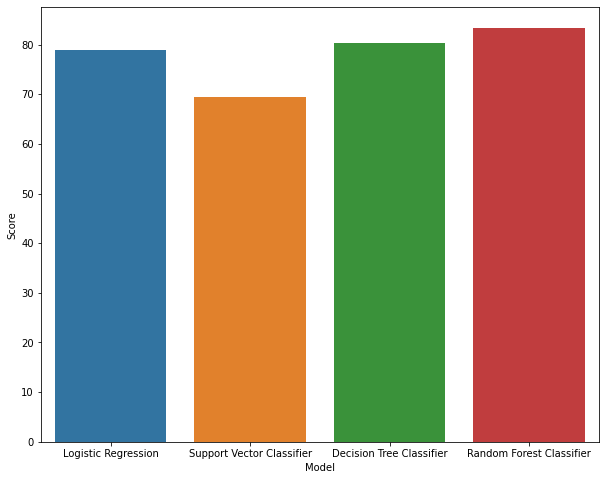

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x=models.Model,y=models.Score)

 **We can see that Random Forest Classifier gives the best accuracy (83.41) among all the other models tried. 
So I will use this model to make the predictions.**

In [48]:
#preparing the data for making the predictions
x_test_final=test_data
x_test_final.shape

(418, 7)

In [53]:
predictions=RF.predict(x_test_final)
output=pd.DataFrame({'Predicted Values':predictions})
output

,Predicted Values
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


 **Finally I have made the predictions using the Random Forest Classifier and made a Data Frame for those predictions named *Output***